**Task 1**

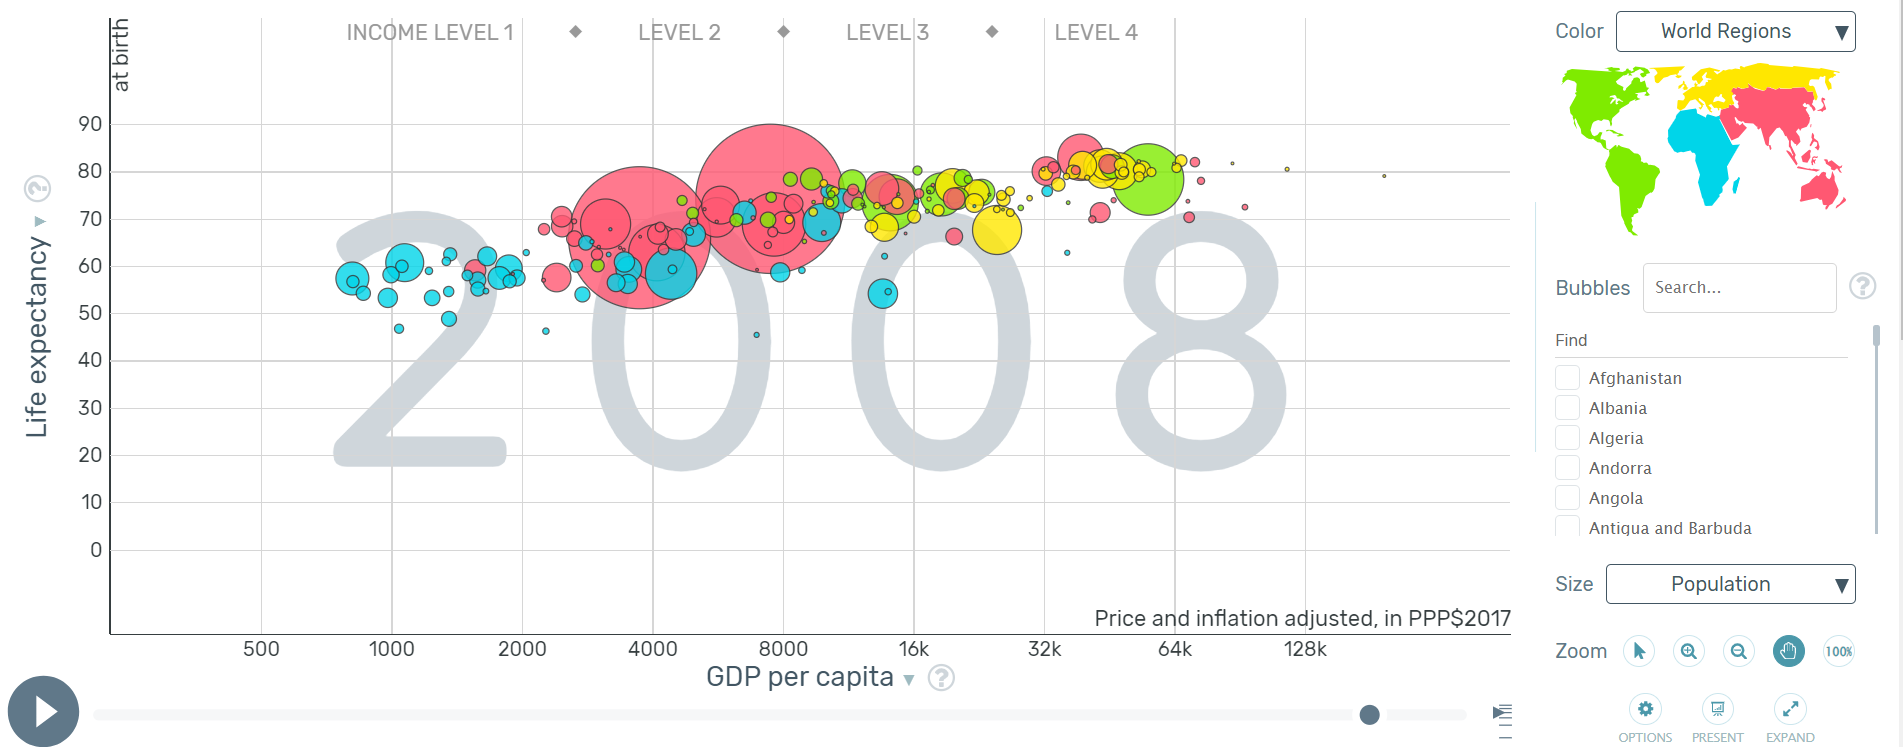

The Aesthetics being used in this visual: X is GDP per Capita, Y is Life Expectancy. The Fill is determined by world region and the size is population



In [78]:
#Downloads
import pandas as pd
from plotnine import ggplot, geom_point, aes, geom_boxplot, scale_size, lims, theme_classic, scale_x_log10, scale_size_continuous, scale_y_log10
import plotnine as p9

In [3]:
#import Data
df1 = pd.read_csv("q1data.csv")
df1.head()

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


C:\Users\Davis\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


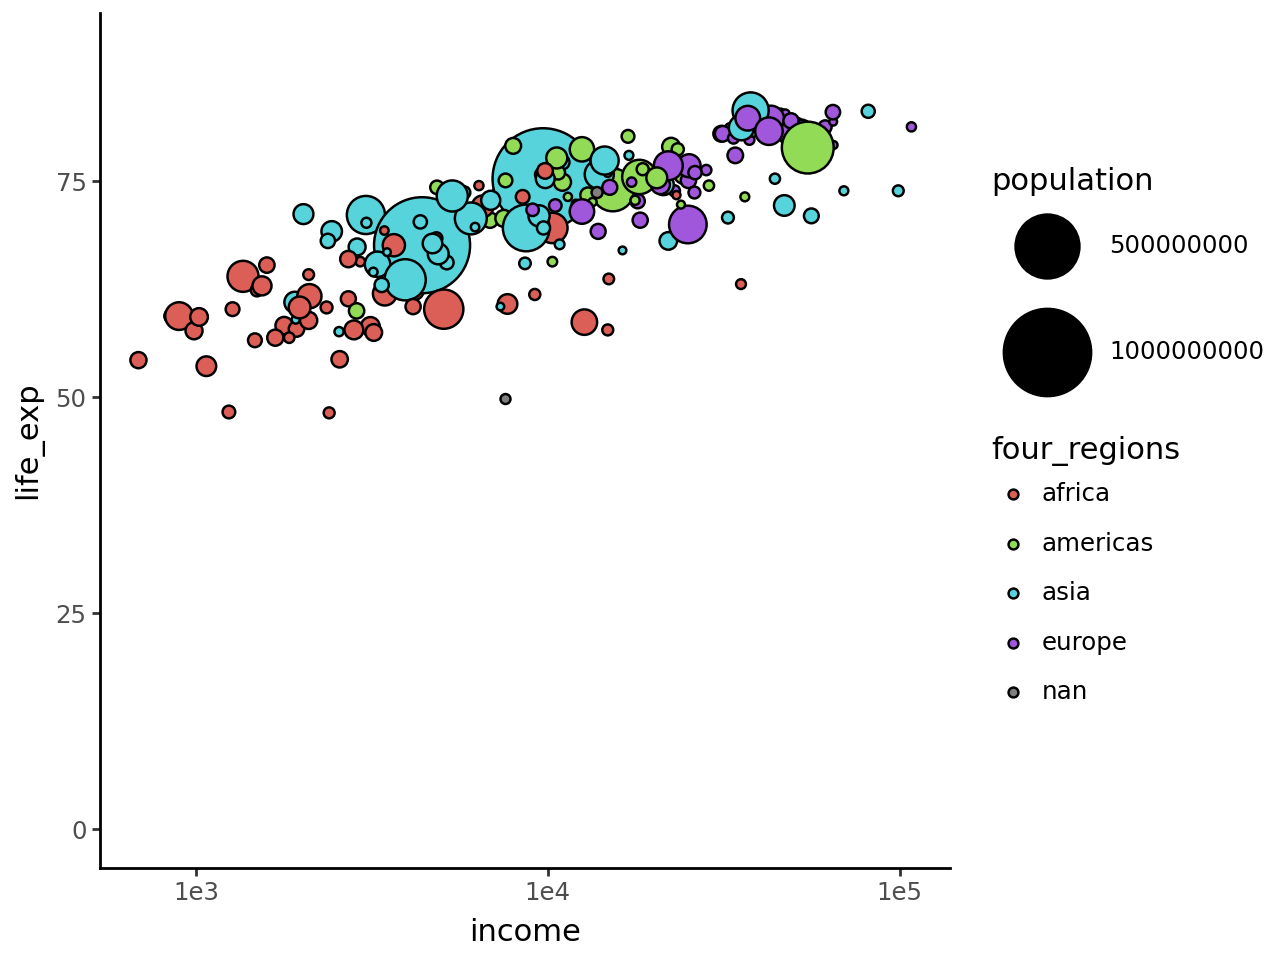

In [80]:
#Create graph

(ggplot(df1, aes(x = "income", y = "life_exp", fill = "four_regions", size = "population"))+ geom_point()+ scale_x_log10() + lims(y = (0,90)) + theme_classic()+ scale_size_continuous(range = (1, 20)))

Making the above graph as a box plot based on income range and color by region

In [87]:
df1["income_float"]= df1["income"].astype(float)
df1["income_int"] = df1["income_float"].round(decimals = -4)
df1["income_notate"] = df1["income_float"]
df1["income_bins"]= df1["income_int"].astype(str)
df1["income_bins"]

0          0.0
1      10000.0
2      10000.0
3      50000.0
4      10000.0
        ...   
192    20000.0
193    10000.0
194        0.0
195        0.0
196        0.0
Name: income_bins, Length: 197, dtype: object

C:\Users\Davis\anaconda3\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 2 rows containing non-finite values.


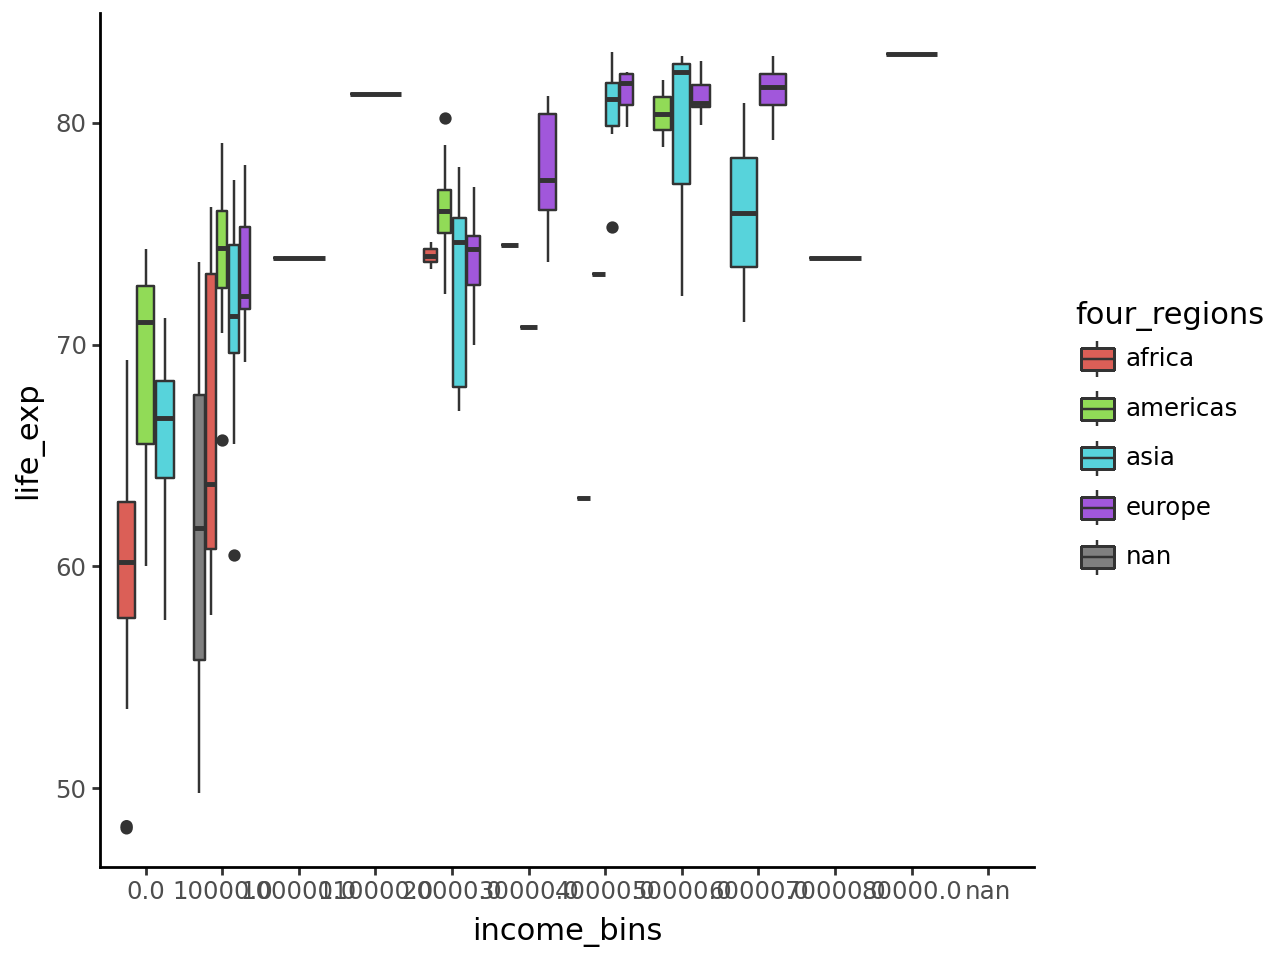

In [101]:
(ggplot(df1, aes(x= "income_bins", y = "life_exp", fill = "four_regions")) + p9.geom_boxplot()  +theme_classic())

The above graph is a representation of life expectancy relative to income across the world. Because it is a box plot a lot of data from the bubble plot is lost, however it is still easy to see that more income is related to a longer life expectancy. The population element is completely lost, and it is very difficult to see many countries that may not show up. The bubble chart is definitely a better choice to represent this data. 

**Task 2**

The aesthetics in this graph are the exports as a % of GDP on the X axis, and the imports as a % of GDP on the y axis, the color of the fill is determined by the world region and the size of the point is determined by the energy use of the country. 

In [52]:
#import Data
df2 = pd.read_csv("Data\q2data.csv")
df2.head()

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN
4,NaN,NaN,434,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [81]:
# df2['energy'] = pd.to_numeric(df2['energy'])
# df2["energy"]

In [55]:
import numpy as np

energy = df2["energy"].to_numpy()
energy[energy == '12.4k']= 12400
energy[energy == '18.8k']= 18800
energy[energy == '19.3k']= 19300
energy[energy == '11.2k']= 11200
# energy.astype(float)
# energy
# df2["energy"]
df2["energy"] = energy
# pd.to_numeric(df2["energyFloat"])
# # df2["energyFloat"]


In [46]:
# df2["energy"].astype(float)


pandas.core.series.Series

In [56]:

# Convert to numeric
df2['exports'] = pd.to_numeric(df2['exports'], errors='coerce')
df2['imports'] = pd.to_numeric(df2['imports'], errors='coerce')
df2['energy'] = pd.to_numeric(df2['energy'], errors='coerce')


C:\Users\Davis\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 78 rows containing missing values.


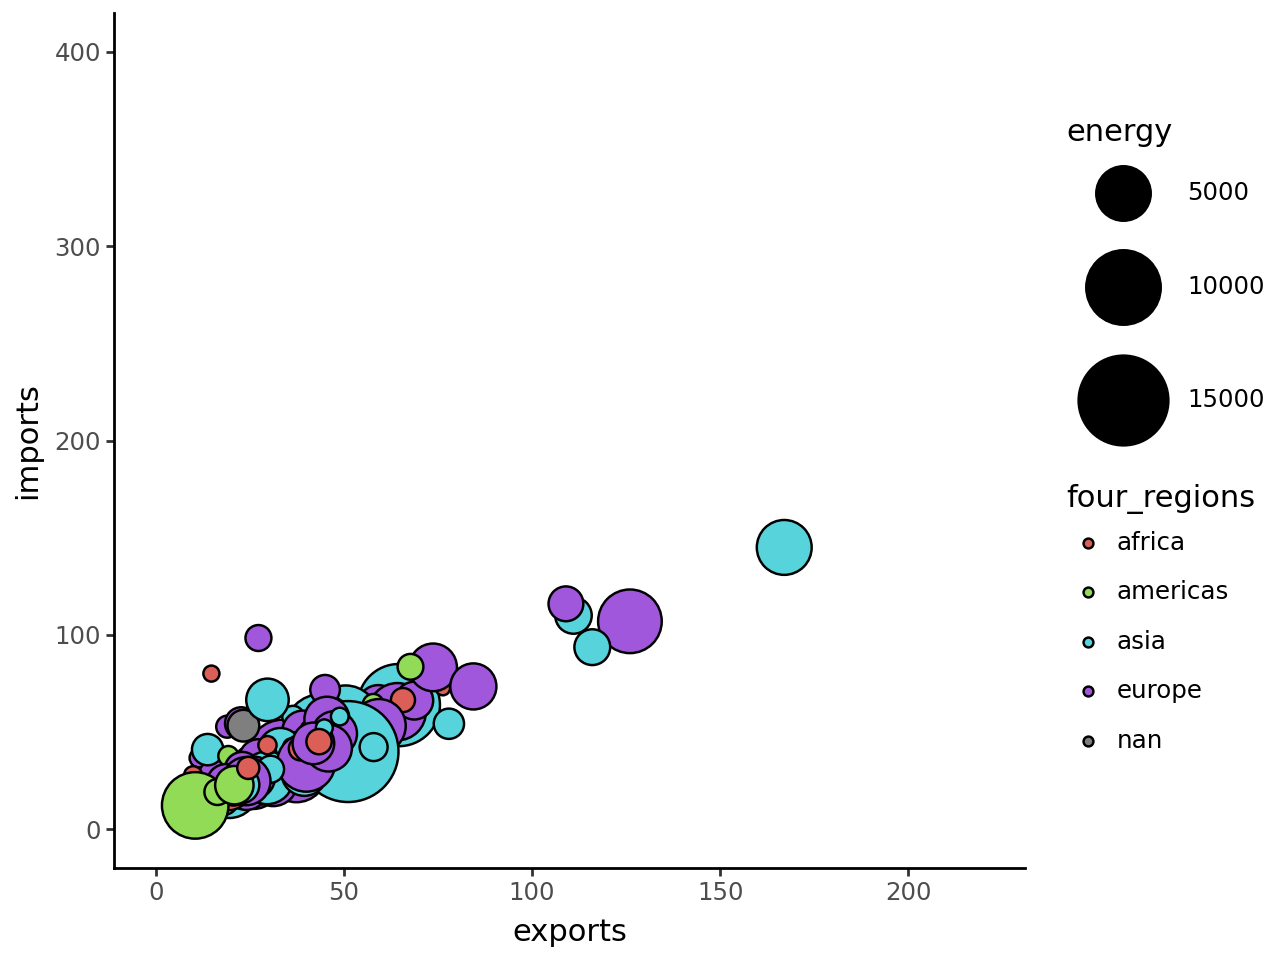

In [73]:
#recreating graph 2

(ggplot(df2, aes(x = "exports", y ="imports", fill = "four_regions", size = "energy")) +  geom_point() + lims(x = (0, 220), y =(0,400))+ theme_classic() + p9.scale_size_continuous(range =(1,20)))

In [ ]:
Creating a different graph to represent the above information. I want to investigate the relationship between imports & exports 
and energy expenditure. First I tried to create a box plot where the y axis is imports/exports, but most countries lie close to 1
The better option is to add the normalized z score of imports and exports


In [127]:
#create a new column that shows imports + exports
#first need to z score normlize

df2["imports_normal"] = (df2["imports"]- df2["imports"].mean()) /df2["imports"].std()
df2["exports_normal"] = (df2["exports"]- df2["exports"].mean()) /df2["exports"].std()
df2["imports+exports_normalized"] = df2["imports_normal"]+df2["exports_normal"]
df2["imports+exports_normalized"]
#Create bins for energy to compare high and low energy using countries
df2["energy_bins"] = pd.qcut(df2["energy"], q =3)
df2["energy_bins"] = df2["energy_bins"].astype(str)

C:\Users\Davis\anaconda3\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 138 rows containing non-finite values.


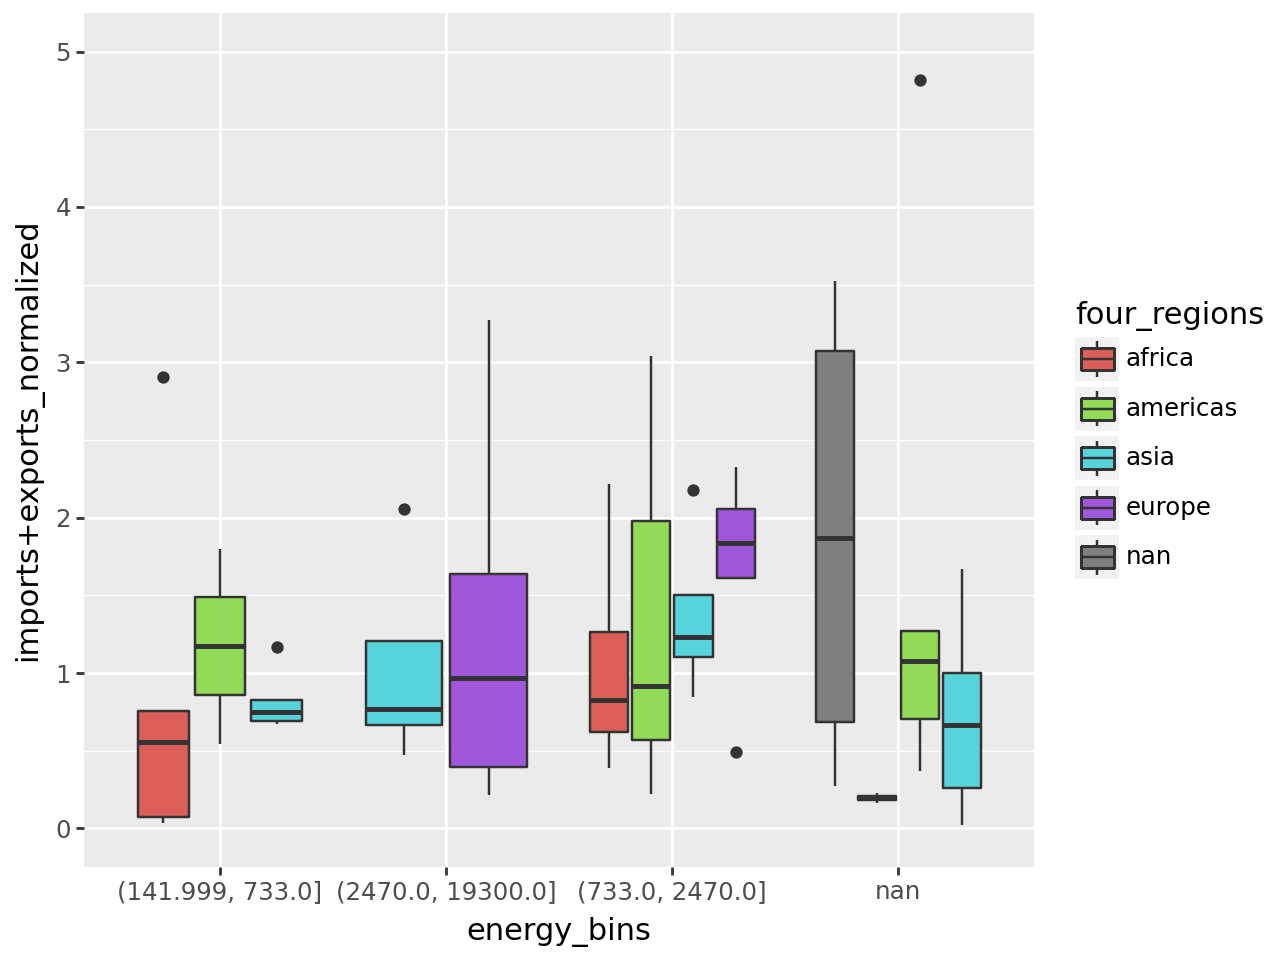

In [130]:
(ggplot(df2, aes(x = "energy_bins", y = "imports+exports_normalized", fill = "four_regions"))+ lims( y = (0,5))+ p9.geom_boxplot())

**Task 3**

The aesthetics of this graph include the number of individuals that use the internet assigned to the x axis, GDP per capita assigned to the y axis, world region is assigned to the fill, and income is assiged to the size of the fill.

In [75]:
#import data
df3 = pd.read_csv("Data\q3data.csv")
df3

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...
210,1.85000,847.0,3270.0,2001,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
211,27.50000,36700.0,NaN,2001,Virgin Islands (U.S.),NaN,NaN,NaN,NaN
212,0.51900,1190.0,4940.0,2001,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
213,0.47800,991.0,2080.0,2001,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


C:\Users\Davis\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 32 rows containing missing values.


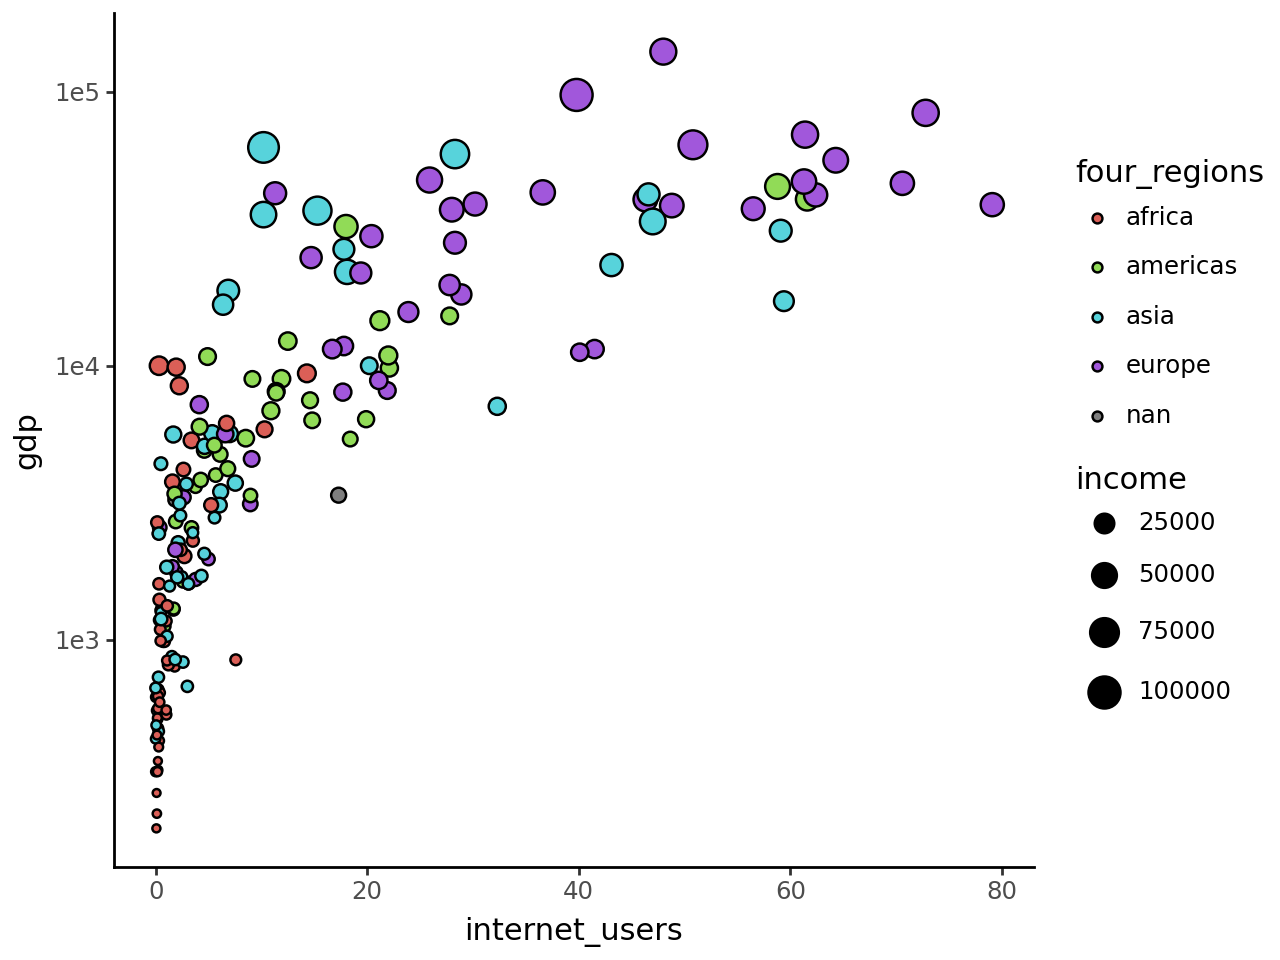

In [82]:
(ggplot(df3, aes(x = "internet_users", y = "gdp", fill = "four_regions", size = "income"))+geom_point() + scale_y_log10()+ theme_classic())